In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Index(['number of users'], dtype='object')


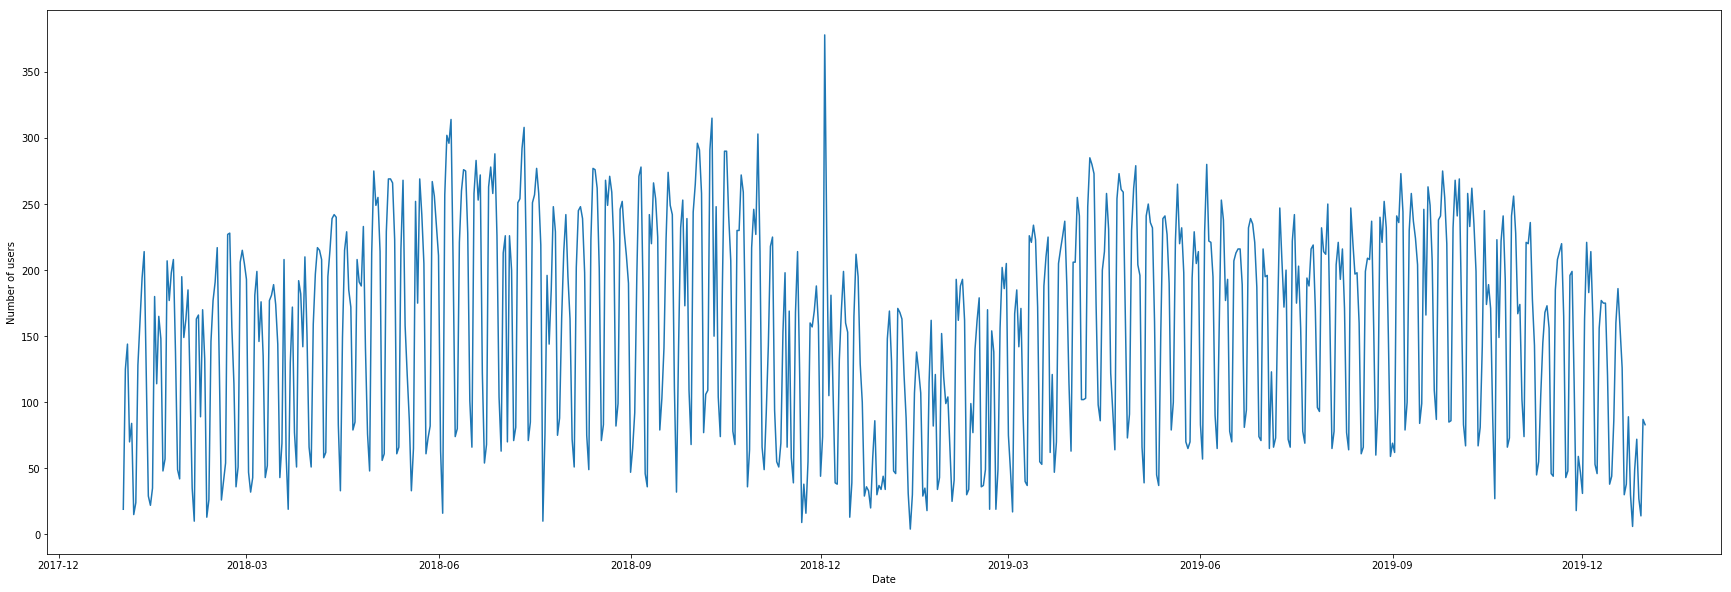

In [194]:
 
df = pd.read_csv('../data/member_daily_training.csv', parse_dates = ['date'], index_col = ['date'])
# df.head()
print(df.columns)
fig, ax = plt.subplots(figsize=(30,10))
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.plot(df)

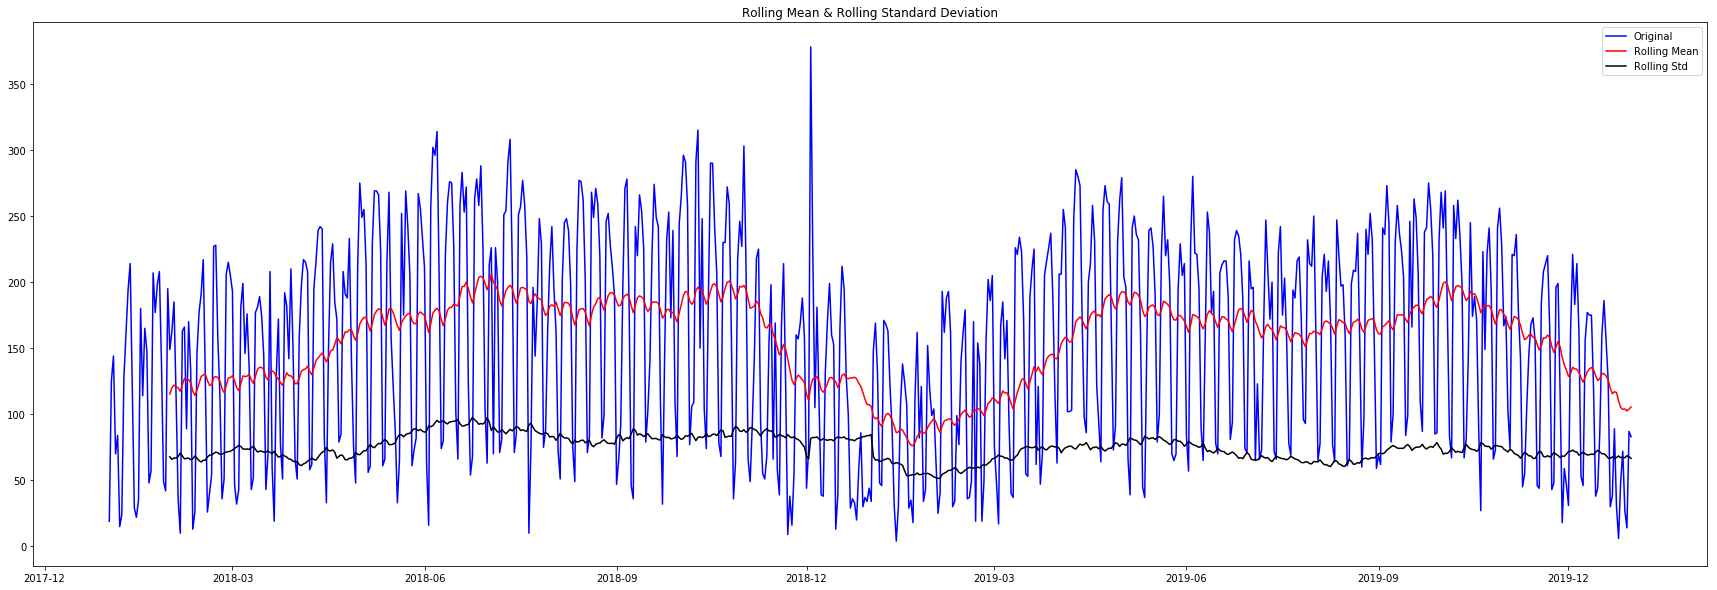

In [4]:

# Determine stationarity
rolling_mean = df.rolling(window = 30).mean()
rolling_std = df.rolling(window = 30).std()

fig, ax = plt.subplots(figsize=(30,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [5]:
result = adfuller(df['number of users'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.7881374833265393
p-value: 0.38636680443056337
Critical Values:
	1%: -3.439606888036868
	5%: -2.865625121924057
	10%: -2.5689454046801052


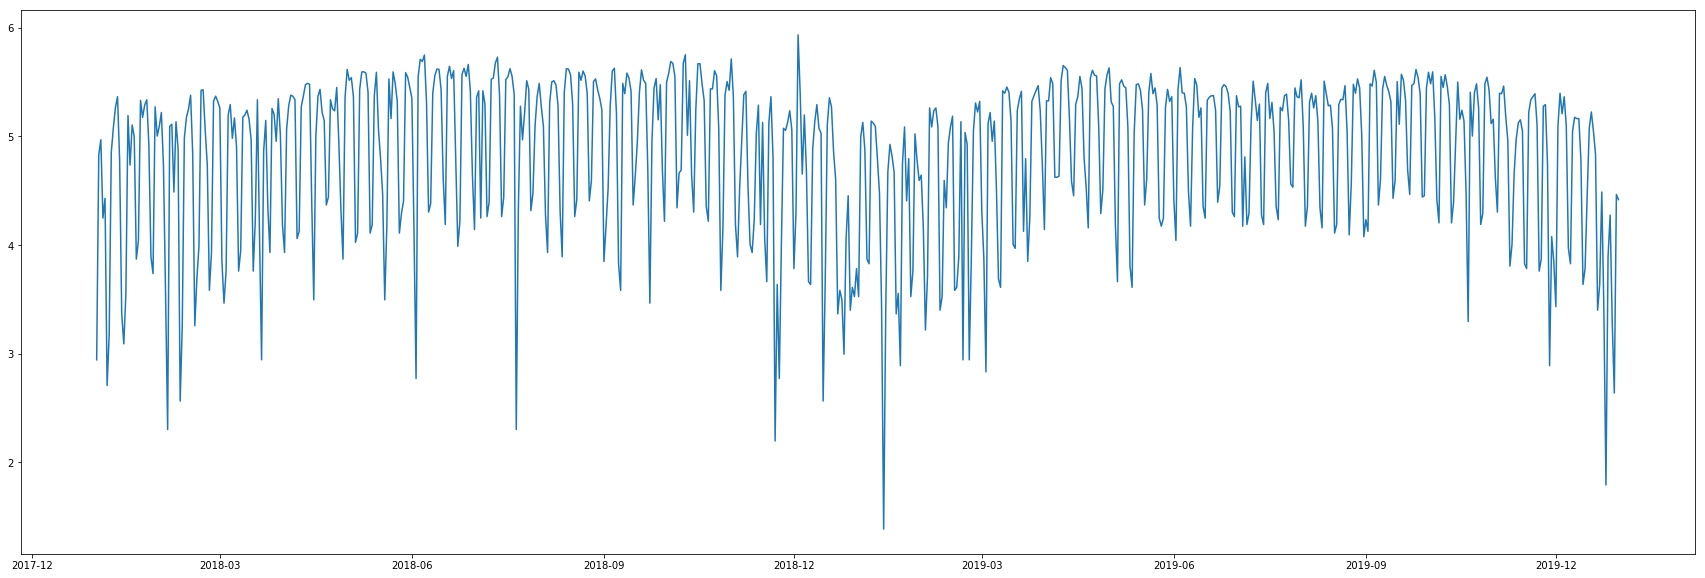

In [6]:
df_log = np.log(df)
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(df_log)

In [7]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    fig, ax = plt.subplots(figsize=(30,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['number of users'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

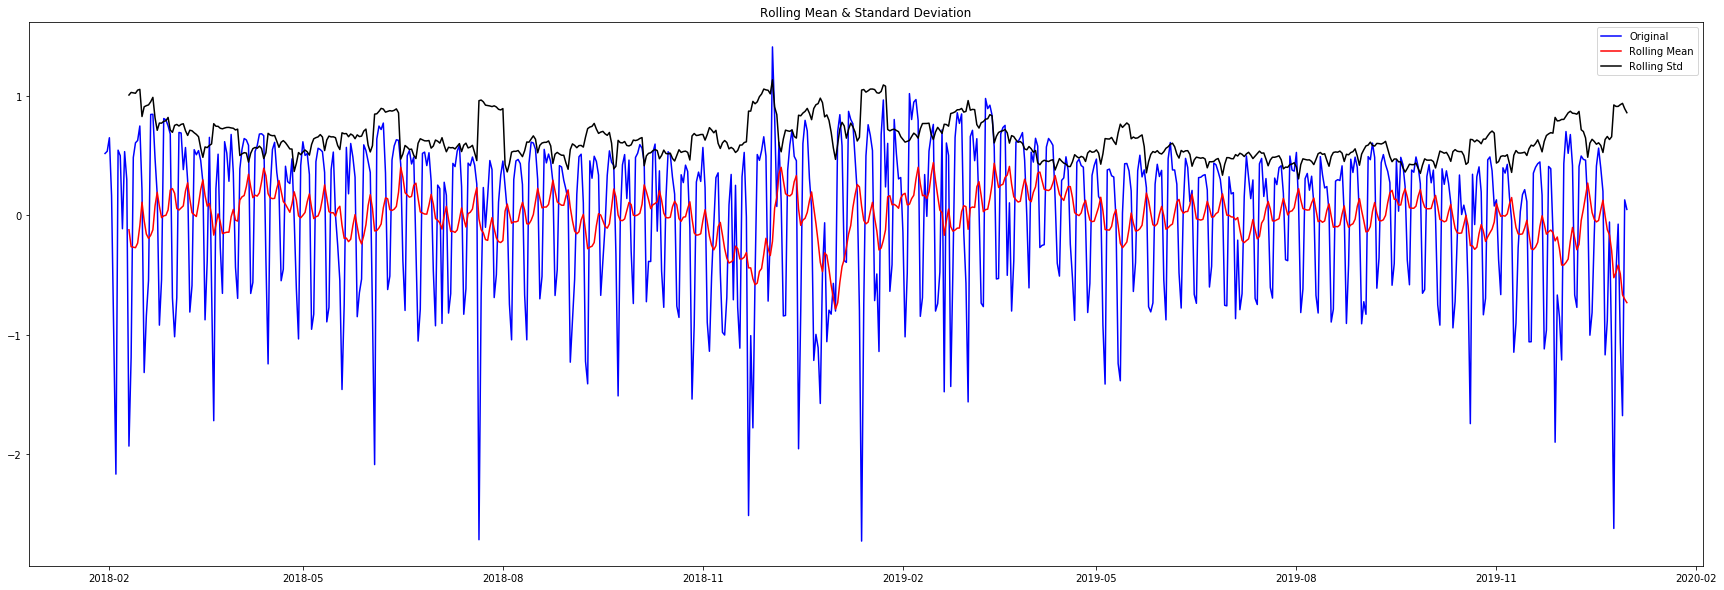

ADF Statistic: -3.811579266087317
p-value: 0.002791041144499671
Critical Values:
	1%: -3.4400031721739515
	5%: -2.865799725091594
	10%: -2.569038427768166


In [8]:
rolling_mean = df_log.rolling(window=30).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

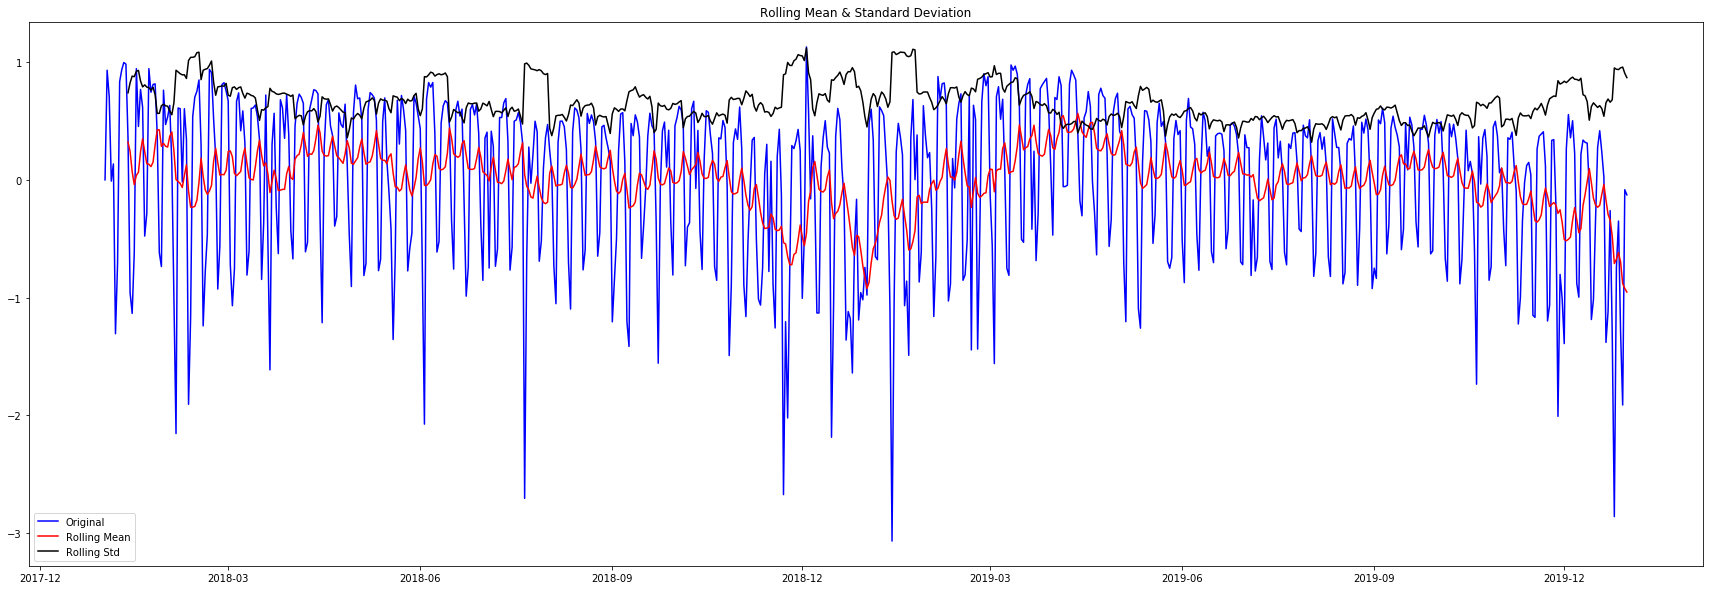

ADF Statistic: -1.8753533629939767
p-value: 0.34374299712346834
Critical Values:
	1%: -3.439606888036868
	5%: -2.865625121924057
	10%: -2.5689454046801052


In [9]:
rolling_mean_exp_decay = df_log.ewm(halflife=30, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

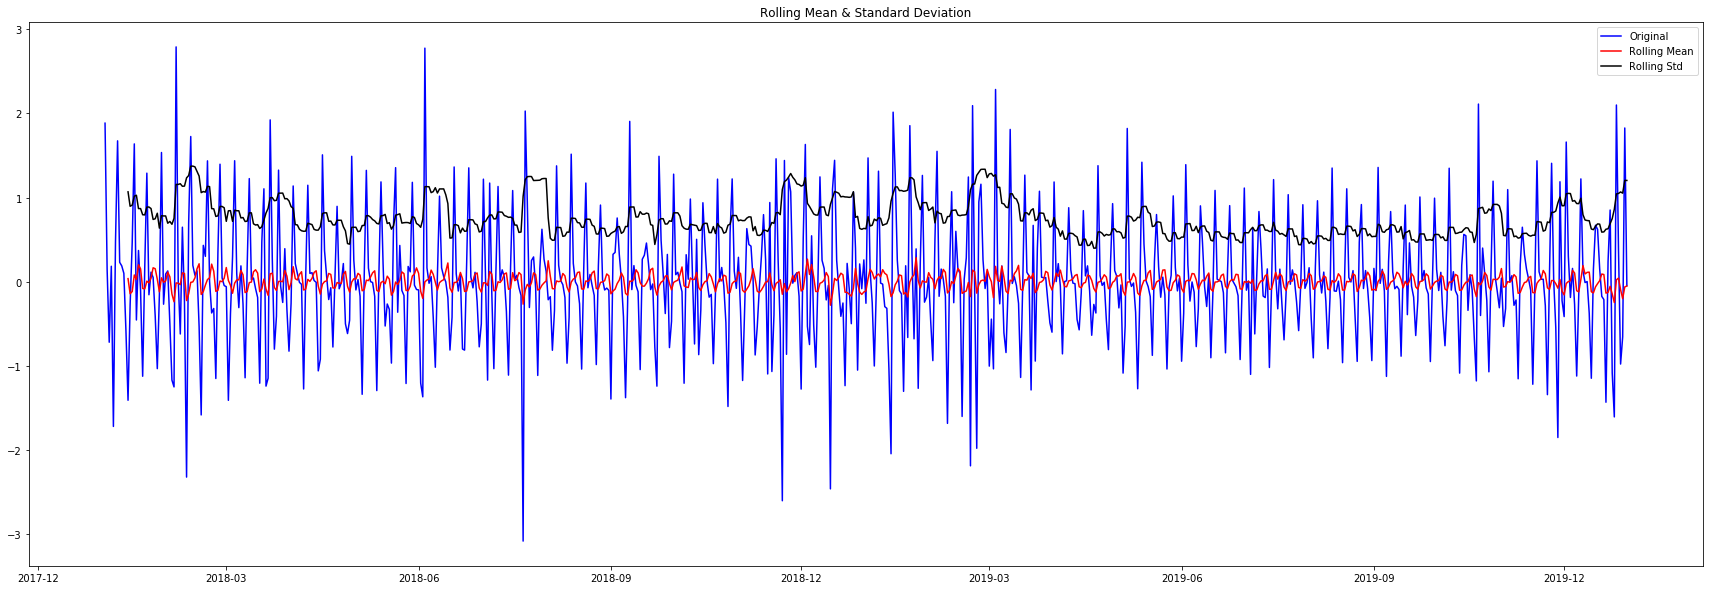

ADF Statistic: -9.342187310292509
p-value: 8.736654959935992e-16
Critical Values:
	1%: -3.439620010600208
	5%: -2.8656309041017756
	10%: -2.5689484851894413
            number of users
date                       
2018-01-01         0.000000
2018-01-02         0.931056
2018-01-03         0.706746
2018-01-04        -0.010802
2018-01-05         0.135612
2018-01-06        -1.307117
2018-01-07        -0.709079
2018-01-08         0.834309
2018-01-09         0.934283
2018-01-10         0.996657
2018-01-11         0.983359
2018-01-12         0.359106
2018-01-13        -0.960048
2018-01-14        -1.134128
2018-01-15        -0.617589
2018-01-16         0.944634
2018-01-17         0.453571
2018-01-18         0.768050
2018-01-19         0.616936
2018-01-20        -0.477654
2018-01-21        -0.287635
2018-01-22         0.944599
2018-01-23         0.744368
2018-01-24         0.810527
2018-01-25         0.815042
2018-01-26         0.384286
2018-01-27        -0.619103
2018-01-28        -0.736178
201

In [135]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


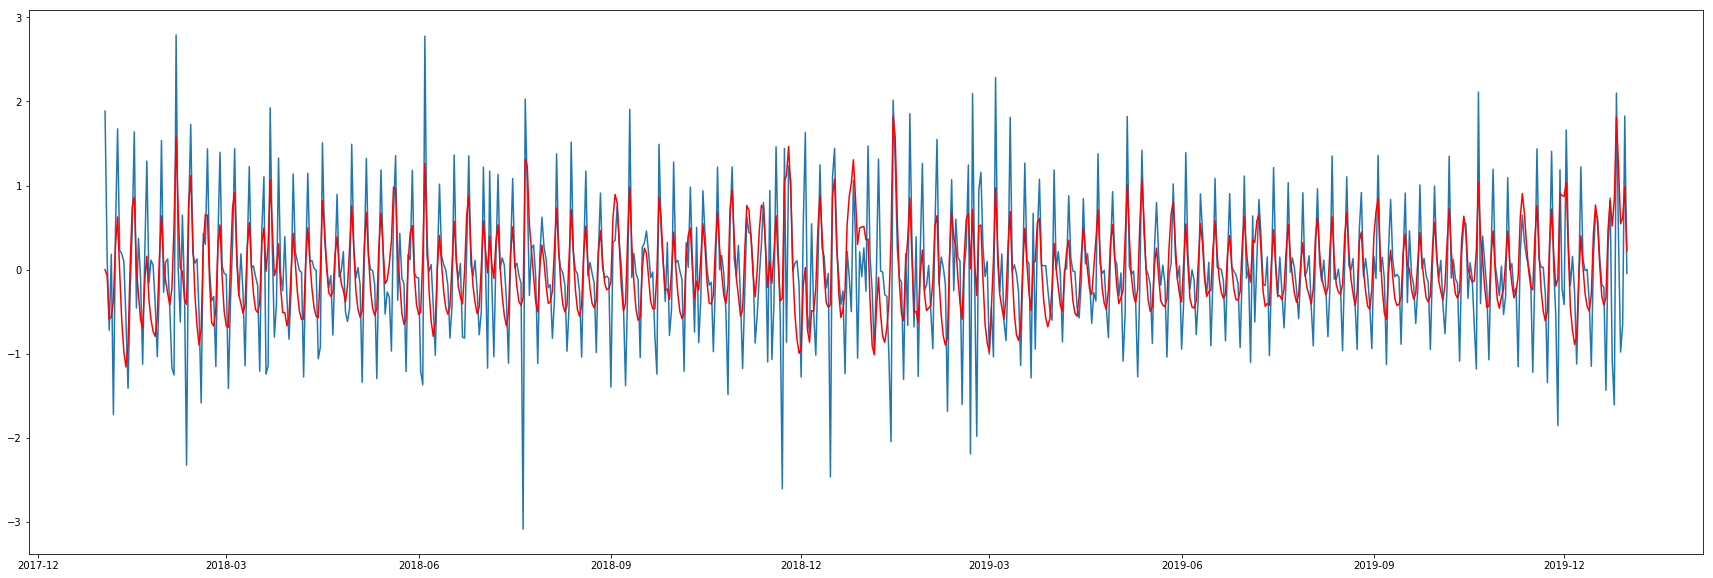

In [132]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

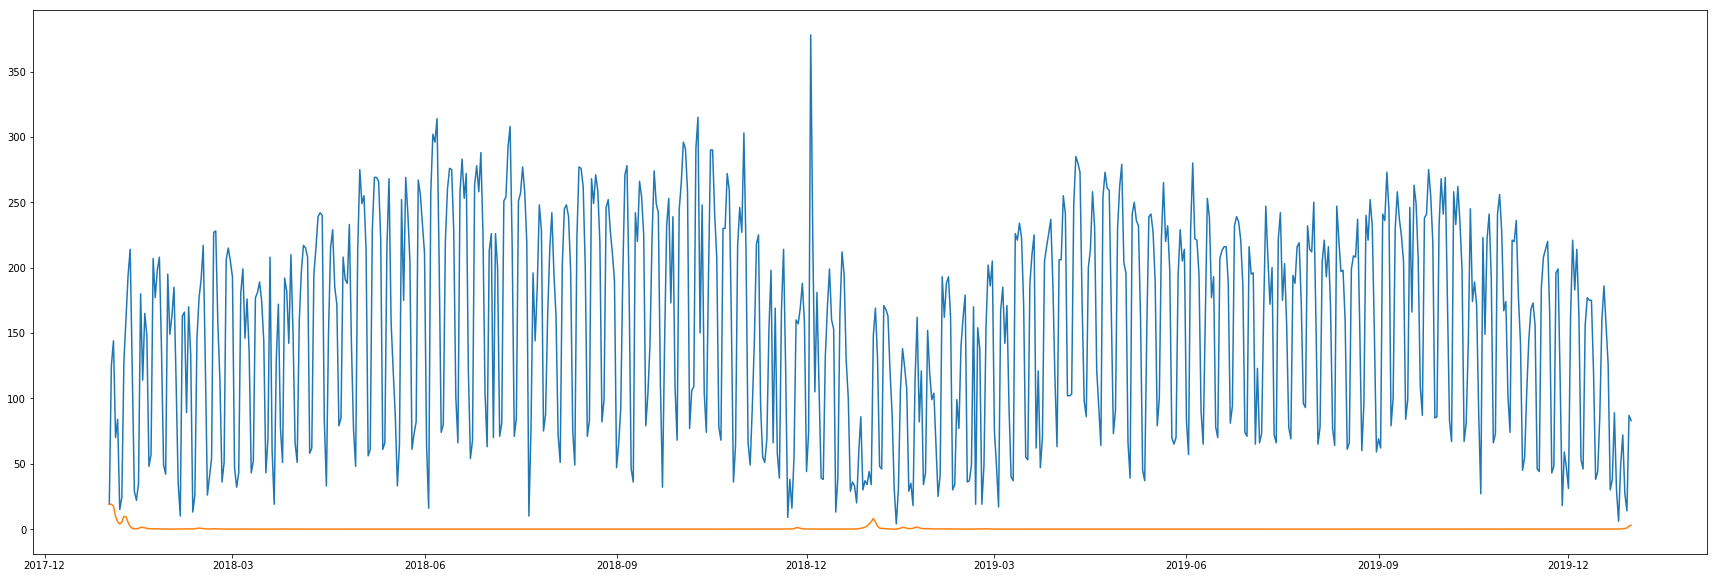

In [133]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['number of users'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(df)
plt.plot(predictions_ARIMA)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Figure(432x288)


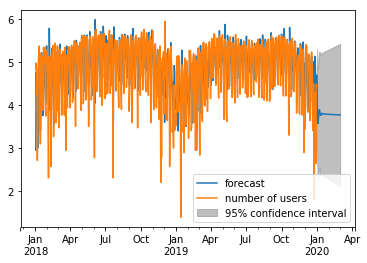

In [134]:
ade = results.plot_predict(1,790)
print(ade)

In [257]:
# read the test data actual
test_df = pd.read_csv('../data/member_daily_testing.csv',  parse_dates = ['date'], index_col = ['date'])

#read test data with all columns
test_regular = pd.read_csv('../data/member_daily_testing.csv',  header=0, names = ['date', 'number of users'])

# get only the duration column for prediction data (2020 jan and 2020 feb)
# test_regular = test_regular[730: len(test_df)]
# test_regular = test_regular.reset_index()
test_regular = test_regular.drop(['date'], axis=1)

# get log value for stationarity
test_df_log = np.log(test_df)


[4.15473798 3.77680818 3.56414072 3.57983137 3.7204685  3.84796328
 3.88881483 3.85297318 3.79356998 3.75651798 3.75517653 3.77543788
 3.79565573 3.80306588 3.79801686 3.78839095 3.78166579 3.78047277
 3.78295837 3.78576085 3.7866985  3.78563107 3.78371105 3.78214476
 3.78142709 3.78132762 3.78132931 3.78106431 3.78047956 3.77974072
 3.77904061 3.77846931 3.77800069 3.77755604 3.77707409 3.7765416
 3.77598191 3.77542554 3.77488851 3.77436835 3.77385321 3.773333
 3.77280488 3.77227204 3.77173928 3.77120938 3.77068223 3.77015606
 3.76962923 3.76910117 3.7685723  3.76804338 3.76751488 3.76698681
 3.76645893 3.76593097 3.76540282 3.76487454 3.76434623 3.76381799]


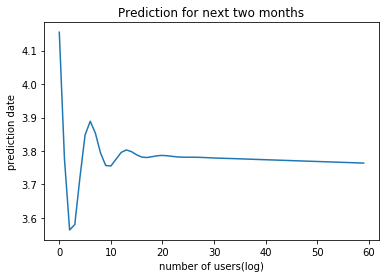

In [221]:
# forcast next two months
pred = results.forecast(steps=60)[0]
print(pred)
plt.title("Prediction for next two months")
plt.xlabel('number of users(log)')
plt.ylabel('prediction date')
plt.plot(pred)


161.0


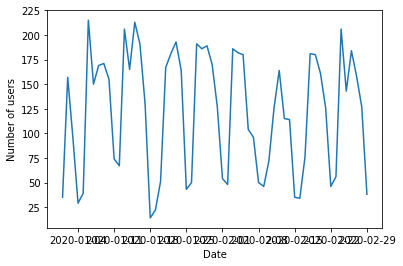

In [173]:
# plot actual data for next two month
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.plot(test_df[730: len(test_df)])


In [175]:
print('actual values of the output:', len(test_df))

actual values of the output 790


In [296]:
# round off the durations 
pred_act =  np.round(np.exp(pred))

# calculate the MAPE
def MAPE_calculation():
    mape_sum = 0
    ini = 730
    
    for item in pred_act:
        act = int(test_regular[ini:(ini+1)]['number of users'])
        diff = (abs( act - int(item))/ act)
    #     print(item, act, diff)
        mape_sum = (mape_sum+ diff)
        ini+=1
        
    return mape_sum

        
# calculate MSE
def MSE_calculation():
    
    mse_sum = 0
    ini = 730
    for item in pred_act:
        act = int(test_regular[ini:(ini+1)]['number of users'])
        diff = ( act - int(item)) ** 2
    #     print(item, act, diff)
        mse_sum = (mse_sum+ diff)
        ini+=1
        
    return mse_sum

        
mape_sum = MAPE_calculation()        
mape = mape_sum/len(test_regular)
print('MAPE sum is' , mape_sum, 'and the MAPE is', mape)

mse_sum = MSE_calculation()
mse = mse_sum / len(test_regular)
print('MSE sum is' , mse_sum, 'and the MSE is', mse)


mape sum is 35.4905990161992 and the mape is 0.04492480888126481
mse sum is 589029 and the mse is 745.6063291139241
MAPE value is 0.04492480888126481
